In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import emukit.test_functions

high_fidelity = emukit.test_functions.non_linear_sin.nonlinear_sin_high
low_fidelity = emukit.test_functions.non_linear_sin.nonlinear_sin_low

In [3]:
from mfGPR.mfGPR import mfGPR

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [4]:
np.random.seed(19**4)

In [5]:
N_low = 50
N_high = 15
noise_level = 0.05

In [6]:
x_plot = np.linspace(0, 1, 200)[:, None]
y_plot_l = low_fidelity(x_plot)
y_plot_h = high_fidelity(x_plot)


x_train_l = np.atleast_2d(np.random.rand(N_low)).T
#x_train_l = np.atleast_2d(np.linspace(0,1,N_low)).T
x_train_h = np.atleast_2d(np.random.permutation(x_train_l)[:N_high])
y_train_l = low_fidelity(x_train_l) + noise_level * np.random.normal(size=x_train_l.shape[0]).reshape(-1, 1)
y_train_h = high_fidelity(x_train_h)+ noise_level * np.random.normal(size=x_train_h.shape[0]).reshape(-1, 1)


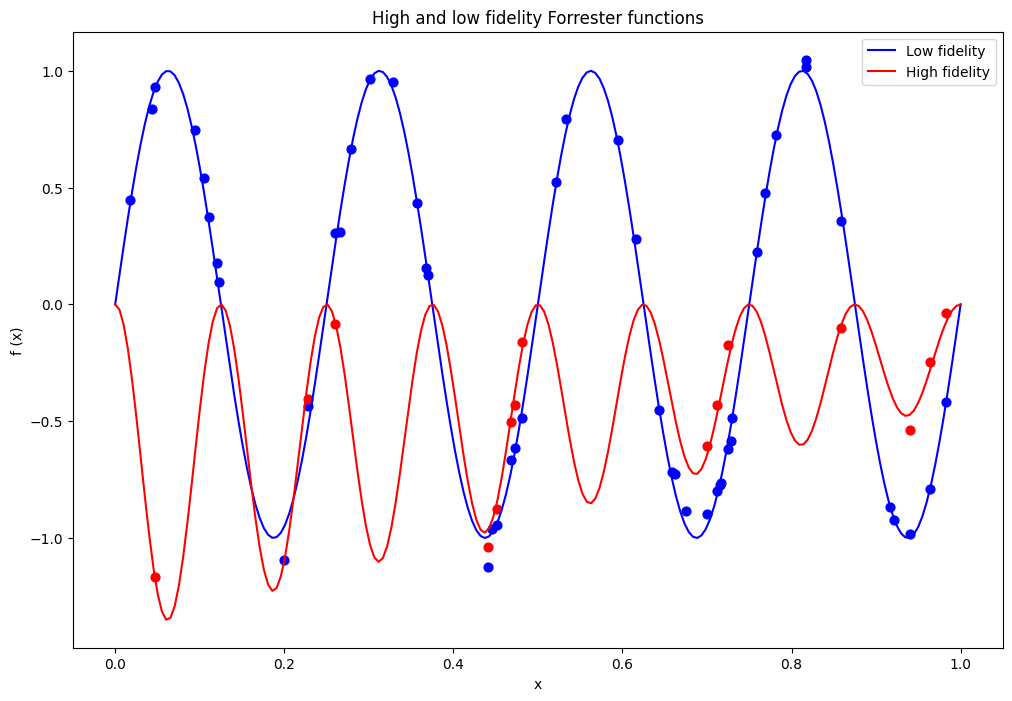

In [7]:
## Plot the original functions

plt.figure(figsize=(12, 8))
plt.plot(x_plot, y_plot_l, 'b')
plt.plot(x_plot, y_plot_h, 'r')
plt.scatter(x_train_l, y_train_l, color='b', s=40)
plt.scatter(x_train_h, y_train_h, color='r', s=40)
plt.ylabel('f (x)')
plt.xlabel('x')
plt.legend(['Low fidelity', 'High fidelity'])
plt.title('High and low fidelity Forrester functions');

In [8]:
#data = {'low': {'data':[x_train_l, y_train_l], 'std':np.random.sample(N_low)},
#        'high_vanilla': {'data':[x_train_h, y_train_h], 'std':np.random.sample(N_high)},
#        'high': {'data':[x_train_h, y_train_h], 'condition': 'low', 'std':np.random.sample(N_high)},
#      }

In [9]:
data = {'low': {'data':[x_train_l, y_train_l]},
        'high_vanilla': {'data':[x_train_h, y_train_h]},#
        'high': {'data':[x_train_h, y_train_h], 'condition': 'low'},
       }

In [10]:
mfGPR_models = mfGPR(data=data, n_samples=1000)

 /project2/andrewferguson/Kirill/env_mfGPR/lib/python3.7/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /project2/andrewferguson/Kirill/env_mfGPR/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [11]:
mean_low, std_low = mfGPR_models['low'].predict(x_plot)
mean_high, std_high = mfGPR_models['high'].predict(x_plot)
mean_vanilla, std_vanilla = mfGPR_models['high_vanilla'].predict(x_plot)

In [19]:
mfGPR_models['high_vanilla'].model

GP_regression.,value,constraints,priors
sum.kern_fidelity_1.variance,0.2789568921013969,+ve,
sum.kern_fidelity_1.lengthscale,1.2437060934072366,+ve,
sum.fixed.variance,1.0,+ve fixed,
Gaussian_noise.variance,0.10169030236026823,+ve,


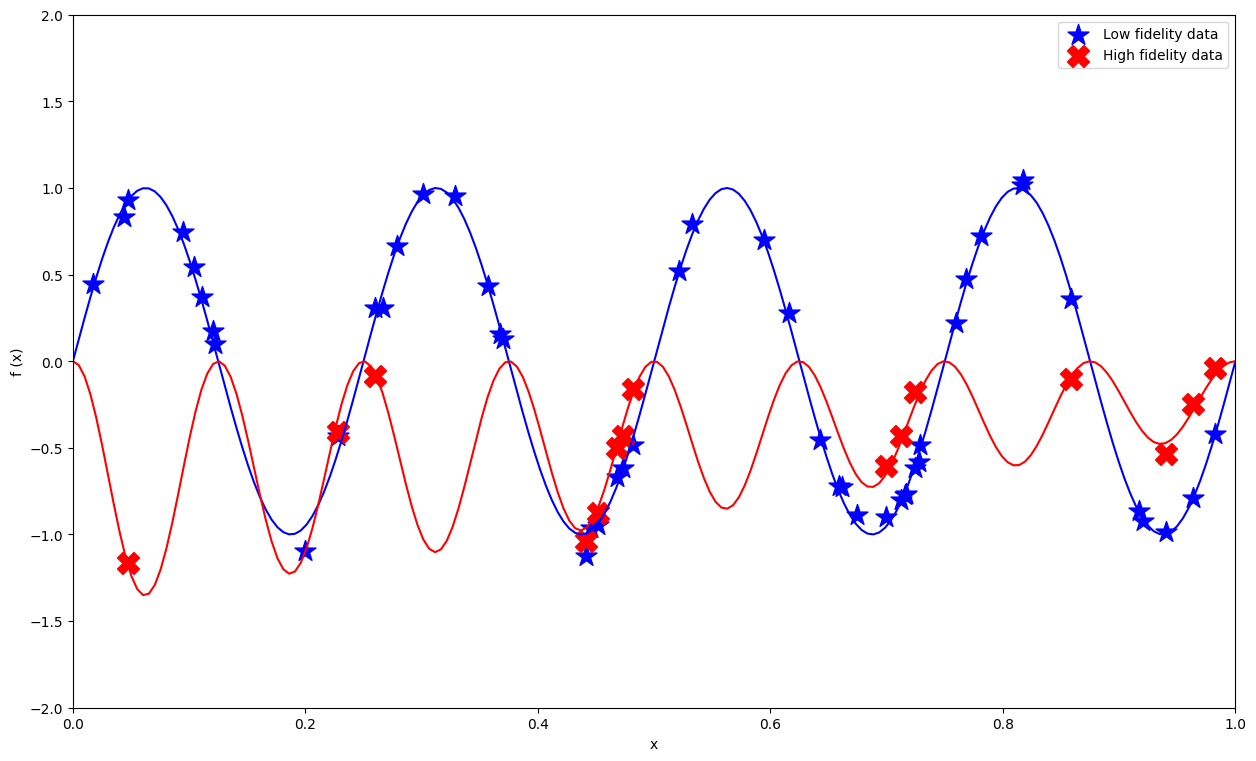

In [13]:
plt.figure(figsize=(15, 9))
#plt.fill_between(x_plot.flatten(), (mean_low - 1.96*std_low).flatten(), 
#                 (mean_low + 1.96*std_low).flatten(), facecolor='b', alpha=0.1)
#plt.fill_between(x_plot.flatten(), (mean_high - 1.96*std_high).flatten(), 
#                 (mean_high + 1.96*std_high).flatten(), facecolor='k', alpha=0.1)
#plt.fill_between(x_plot.flatten(), (mean_vanilla - 1.96*std_vanilla).flatten(), 
#                 (mean_vanilla + 1.96*std_vanilla).flatten(), facecolor='r', alpha=0.1)

plt.scatter(x_train_l, y_train_l, color='b', s=250, label='Low fidelity data', marker='*')
plt.scatter(x_train_h, y_train_h, color='r', s=250, label='High fidelity data', marker='X')

plt.plot(x_plot, y_plot_l, 'b')
plt.plot(x_plot, y_plot_h, 'r')
#plt.plot(x_plot, mean_low, '--', color='b', label='Low fidelity fit')
#plt.plot(x_plot, mean_high, '--', color='k')
#plt.plot(x_plot, mean_vanilla, '--', color='r', label='High fidelity fit')
plt.ylabel('f (x)')
plt.xlabel('x')
plt.xlim(0,1)
plt.ylim(-2, 2)
#plt.legend(['Low Fidelity', 'High Fidelity', 'Predicted Low Fidelity', 'Predicted High Fidelity', 'Predicted Vanilla'])
plt.legend()

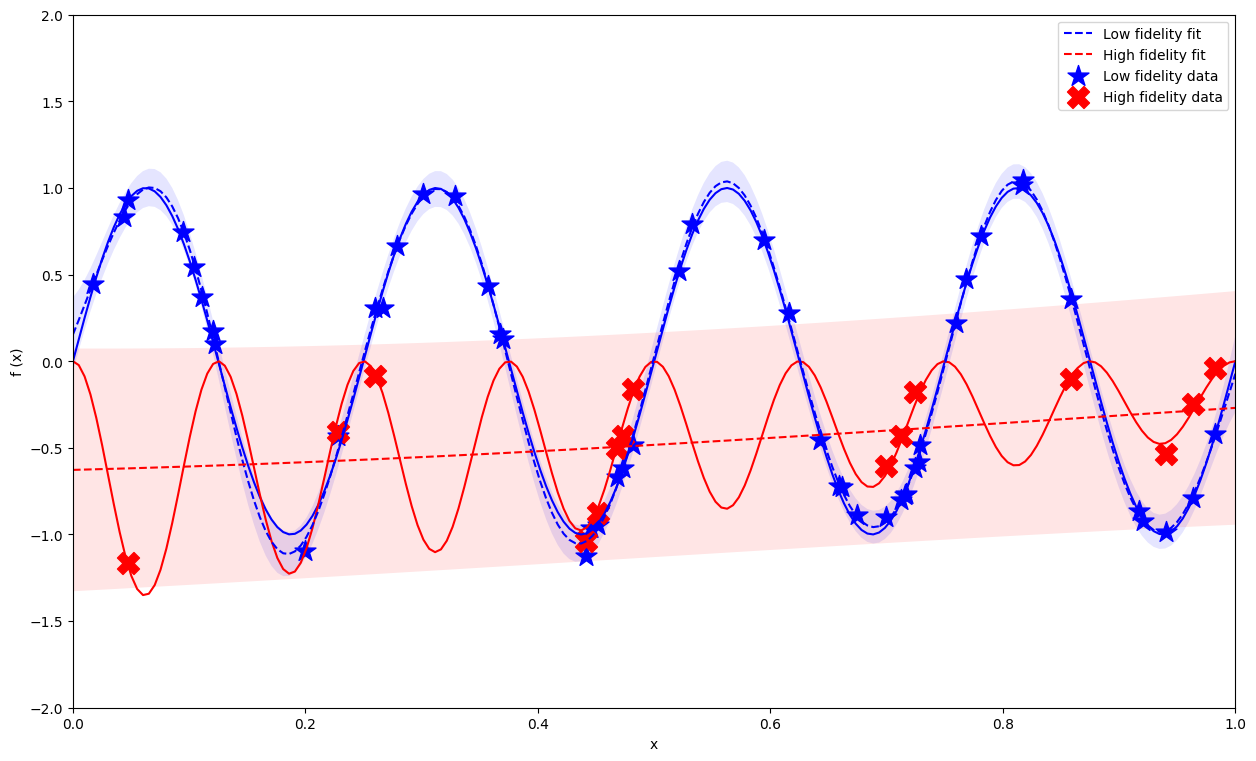

In [14]:
plt.figure(figsize=(15, 9))
plt.fill_between(x_plot.flatten(), (mean_low - 1.96*std_low).flatten(), 
                 (mean_low + 1.96*std_low).flatten(), facecolor='b', alpha=0.1)
#plt.fill_between(x_plot.flatten(), (mean_high - 1.96*std_high).flatten(), 
#                 (mean_high + 1.96*std_high).flatten(), facecolor='k', alpha=0.1)
plt.fill_between(x_plot.flatten(), (mean_vanilla - 1.96*std_vanilla).flatten(), 
                 (mean_vanilla + 1.96*std_vanilla).flatten(), facecolor='r', alpha=0.1)

plt.plot(x_plot, y_plot_l, 'b')
plt.plot(x_plot, y_plot_h, 'r')
plt.plot(x_plot, mean_low, '--', color='b', label='Low fidelity fit')
#plt.plot(x_plot, mean_high, '--', color='k')
plt.plot(x_plot, mean_vanilla, '--', color='r', label='High fidelity fit')
plt.scatter(x_train_l, y_train_l, color='b', s=250, label='Low fidelity data', marker='*')
plt.scatter(x_train_h, y_train_h, color='r', s=250, label='High fidelity data', marker='X')
plt.ylabel('f (x)')
plt.xlabel('x')
plt.xlim(0,1)
plt.ylim(-2, 2)
#plt.legend(['Low Fidelity', 'High Fidelity', 'Predicted Low Fidelity', 'Predicted High Fidelity', 'Predicted Vanilla'])
plt.legend()

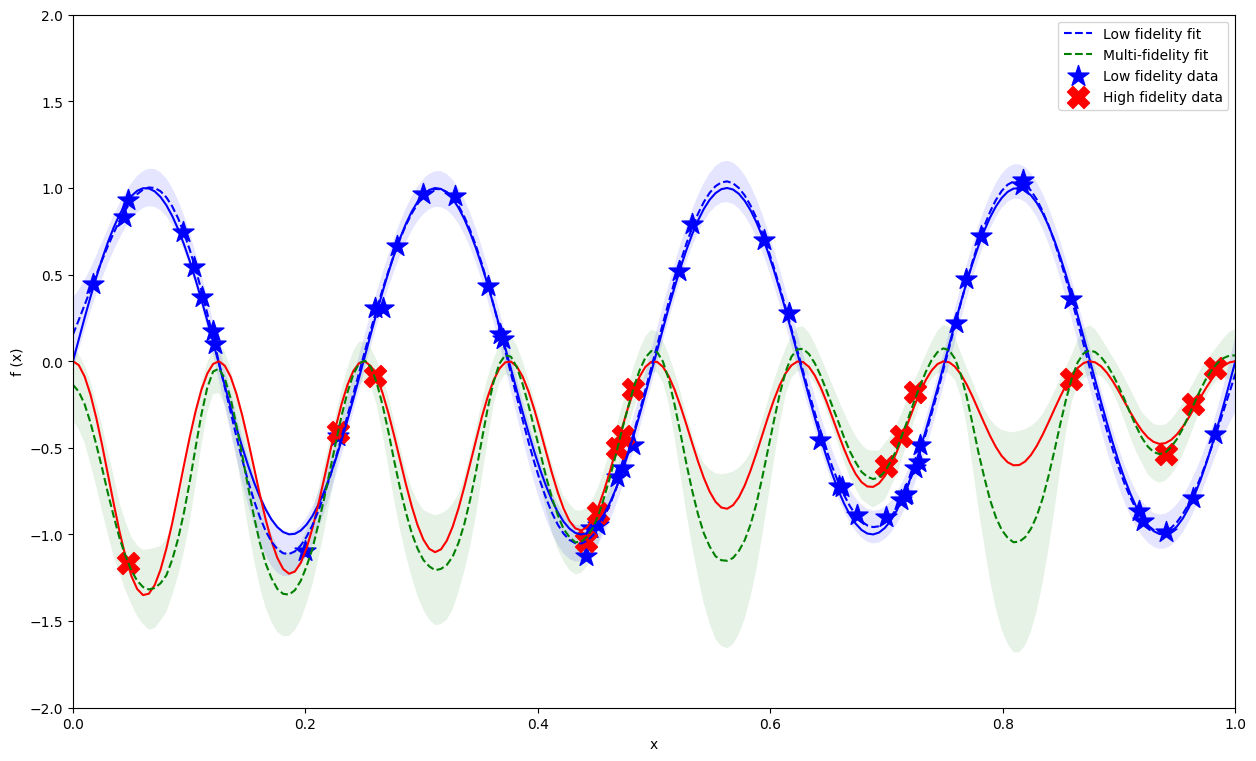

In [15]:
plt.figure(figsize=(15, 9))
plt.fill_between(x_plot.flatten(), (mean_low - 1.96*std_low).flatten(), 
                 (mean_low + 1.96*std_low).flatten(), facecolor='b', alpha=0.1)
plt.fill_between(x_plot.flatten(), (mean_high - 1.96*std_high).flatten(), 
                 (mean_high + 1.96*std_high).flatten(), facecolor='g', alpha=0.1)
#plt.fill_between(x_plot.flatten(), (mean_vanilla - 1.96*std_vanilla).flatten(), 
#                 (mean_vanilla + 1.96*std_vanilla).flatten(), facecolor='r', alpha=0.1)

plt.plot(x_plot, y_plot_l, 'b')
plt.plot(x_plot, y_plot_h, 'r')
plt.plot(x_plot, mean_low, '--', color='b', label='Low fidelity fit')
#plt.plot(x_plot, mean_vanilla, '--', color='r', label='High fidelity fit')
plt.plot(x_plot, mean_high, '--', color='g', label='Multi-fidelity fit')
plt.scatter(x_train_l, y_train_l, color='b', s=250, label='Low fidelity data', marker='*')
plt.scatter(x_train_h, y_train_h, color='r', s=250, label='High fidelity data', marker='X')
plt.ylabel('f (x)')
plt.xlabel('x')
plt.xlim(0,1)
plt.ylim(-2, 2)
#plt.legend(['Low Fidelity', 'High Fidelity', 'Predicted Low Fidelity', 'Predicted High Fidelity', 'Predicted Vanilla'])
plt.legend()